In [19]:
import pandas as pd
import matplotlib.pyplot as plt

latest = "02-10_15-40-55"

dense_log_path = f"res/mcubes_benchmark/{latest}/Mcubes_dense_log.txt"   
sparse_log_path = f"res/mcubes_benchmark/{latest}/Mcubes_sparse_log.txt"
levelmap_log_path = f"res/mcubes_benchmark/{latest}/Mcubes_levelmap_log.txt"
levelset_log_path = f"res/mcubes_benchmark/{latest}/Mcubes_levelset_log.txt"
setup_log_path = f"res/mcubes_benchmark/{latest}/Mcubes_setup_log.txt"

In [20]:
dense_log = pd.read_csv(dense_log_path)
sparse_log = pd.read_csv(sparse_log_path)
levelmap_log = pd.read_csv(levelmap_log_path)
levelset_log = pd.read_csv(levelset_log_path)
setup_log = pd.read_csv(setup_log_path)

In [21]:
sum = 0
for s in sparse_log["Duration in s"]:
    sum += s
print("sparse time: ", sum)
sum = 0
for s in dense_log["Duration in s"]:
    sum += s
print("dense time: ", sum)

sparse time:  40.70541669999999
dense time:  27.176194200000023


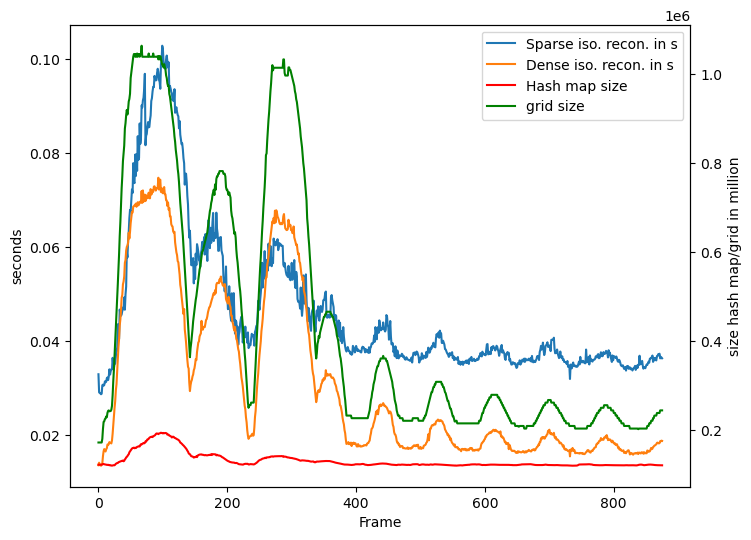

In [22]:
fig, ax1 = plt.subplots(figsize=(8,6))

# Plot sparse time
ax1.plot(sparse_log["Duration in s"], label="Sparse iso. recon. in s")
ax1.plot(dense_log["Duration in s"], label="Dense iso. recon. in s")
ax1.set_xlabel('Frame')
ax1.set_ylabel("seconds")

ax2 = ax1.twinx()
ax2.plot(sparse_log["#Level Map"], color="red", label="Hash map size")
ax2.plot(dense_log['#Grid Vertices'], color="green", label="grid size")
ax2.set_ylabel("size hash map/grid in million")

line1, label1 = ax1.get_legend_handles_labels()
line2, label2 = ax2.get_legend_handles_labels()
lines = line1 + line2
labels = label1 + label2
plt.legend(lines, labels, loc="best")

plt.show()